In [1]:
import gensim
import networkx as nx
from src import utils
import matplotlib.pyplot as plt
%matplotlib inline

def plot_graph_and_vector(file_graph, file_embedding, file_colors):
    
    di_graph, colors = utils.load_graph_and_colors(file_graph=file_graph, file_colors=file_colors, directed=True)
    model = gensim.models.KeyedVectors.load_word2vec_format(file_embedding)
    nodes = di_graph.nodes()

    pos = {}
    for i, node in enumerate(model.index2word):
        pos[int(node)] = model.vectors[i, :]

    node_color = [colors[int(node)] for node in nodes]

    fig, ax = plt.subplots(figsize=(12, 6), ncols=2)

    ax[0].set_title('Barbell graph')
    nx.draw_networkx(G=di_graph, nodes=nodes, node_size=600, with_labels=False, width=0.4,
                     alpha=0.9, node_color=node_color, ax=ax[0])

    ax[1].set_title('Struc2Vec 2 dimensions')
    nx.draw_networkx(G=di_graph, pos=pos, nodes=nodes, node_color=node_color, width=0.4,
                     node_size=600, arrows=True, with_labels=False, alpha=0.9, ax=ax[1])
    

# Create embeddings

In [2]:
# With OPTS
# !python src/main.py --input graph/barbell.edgelist --output emb/barbell.emb \
#     --num-walks 20 --walk-length 80 \
#     --window-size 5 --dimensions 2 --OPT1 True --OPT2 True --OPT3 True --until-layer 6
!python src/main.py --input graph/barbell.edgelist --output emb/barbell.emb \
    --num-walks 20 --walk-length 80 \
    --window-size 5 --dimensions 2 --until-layer 6

# Plot graphs

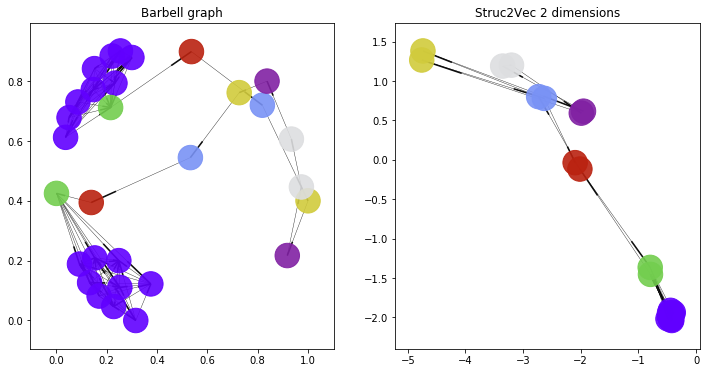

In [3]:
plot_graph_and_vector(file_graph='graph/barbell.edgelist',
                      file_embedding='emb/barbell.emb',
                      file_colors='graph/barbell.colors')

In [4]:
!python src/main.py --input graph/barbell-3-balls.edgelist --output emb/barbell-3-balls.emb \
    --num-walks 20 --walk-length 80 \
    --window-size 5 --dimensions 2 --until-layer 6 --weighted --directed

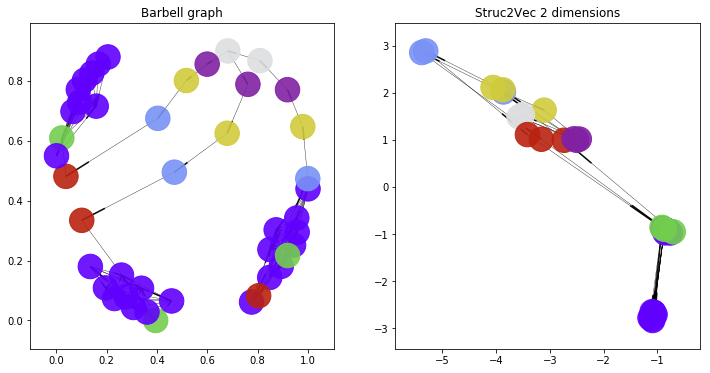

In [5]:
plot_graph_and_vector(file_graph='graph/barbell-3-balls.edgelist',
                      file_embedding='emb/barbell-3-balls.emb',
                      file_colors='graph/barbell-3-balls.colors')

In [6]:
!python src/main.py --input graph/barbell-weight-1-10.edgelist --output emb/barbell-weight-1-10.emb \
    --num-walks 20 --walk-length 80 \
    --window-size 5 --dimensions 2 --until-layer 6 --weighted --directed

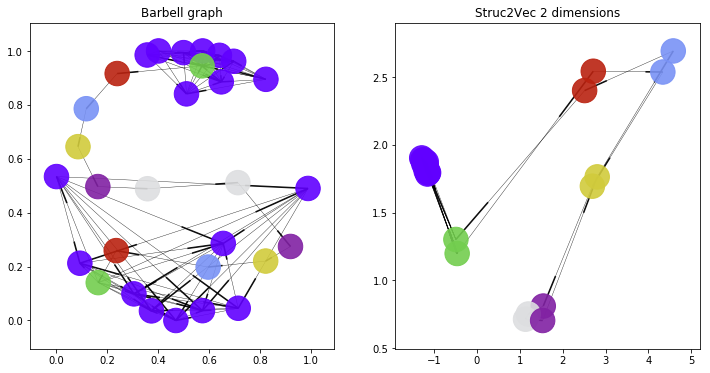

In [7]:
plot_graph_and_vector(file_graph='graph/barbell-weight-1-10.edgelist',
                      file_embedding='emb/barbell-weight-1-10.emb',
                      file_colors='graph/barbell.colors')

In [8]:
!python src/main.py --input graph/barbell-3-balls-weight-1-10.edgelist --output emb/barbell-3-balls-weight-1-10.emb \
    --num-walks 20 --walk-length 80 \
    --window-size 5 --dimensions 2 --until-layer 6 --weighted --directed

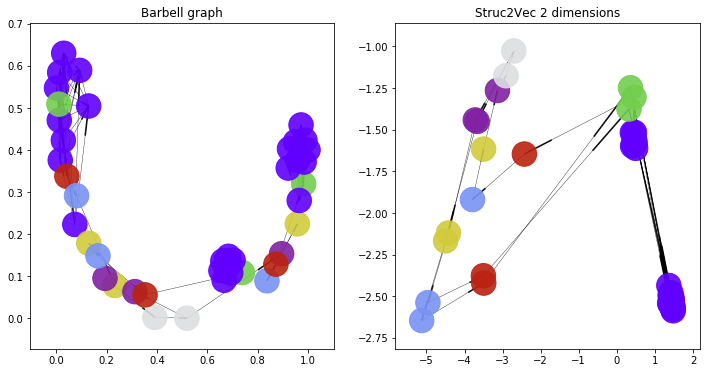

In [9]:
plot_graph_and_vector(file_graph='graph/barbell-3-balls-weight-1-10.edgelist',
                      file_embedding='emb/barbell-3-balls-weight-1-10.emb',
                      file_colors='graph/barbell-3-balls.colors')